In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# connect to zillow database
conn = sqlite3.connect("Resources/zillow.db")

In [3]:
# retrieve data from database
query = "SELECT * FROM original_extracted"

In [4]:
# read and display data
zillow_df = pd.read_sql_query(query, conn)
zillow_df.head()

,Zipcode,Zillow_value_per_Zip,State,City,Street,Bedroom,Bathroom,Area,PPSq,LotArea,Latitude,Longitude,ListedPrice,PriceTier
0,85718,706861.0,AZ,Tucson,N Campo Abierto,3,2.0,1246,204.574639,0.137741,32.707620,-114.68164,254900.0,between 251 and 300
1,85260,676715.0,AZ,Scottsdale,E Charter Oak Dr,3,2.0,1008,193.452381,0.135147,32.708180,-114.67869,195000.0,less than 250
2,85388,447675.0,AZ,Surprise,W Christy Dr,3,2.0,1719,218.150087,0.166781,32.718510,-114.66653,375000.0,between 351 and 400
3,85209,445784.0,AZ,Mesa,S Luther,3,2.0,1110,252.252252,0.153352,32.678060,-114.65254,280000.0,between 251 and 300
4,85249,662463.0,AZ,Chandler,E Victoria St,3,2.0,1056,132.575758,0.164141,32.678486,-114.63007,140000.0,less than 250


In [5]:
# drop columns
zillow_df = zillow_df.drop(columns=["State", "City", "Street", "PriceTier"])

In [6]:
# brief summary of zillow DataFrame
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zipcode               489 non-null    int64  
 1   Zillow_value_per_Zip  489 non-null    float64
 2   Bedroom               489 non-null    int64  
 3   Bathroom              489 non-null    float64
 4   Area                  489 non-null    int64  
 5   PPSq                  489 non-null    float64
 6   LotArea               489 non-null    float64
 7   Latitude              489 non-null    float64
 8   Longitude             489 non-null    float64
 9   ListedPrice           489 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 38.3 KB


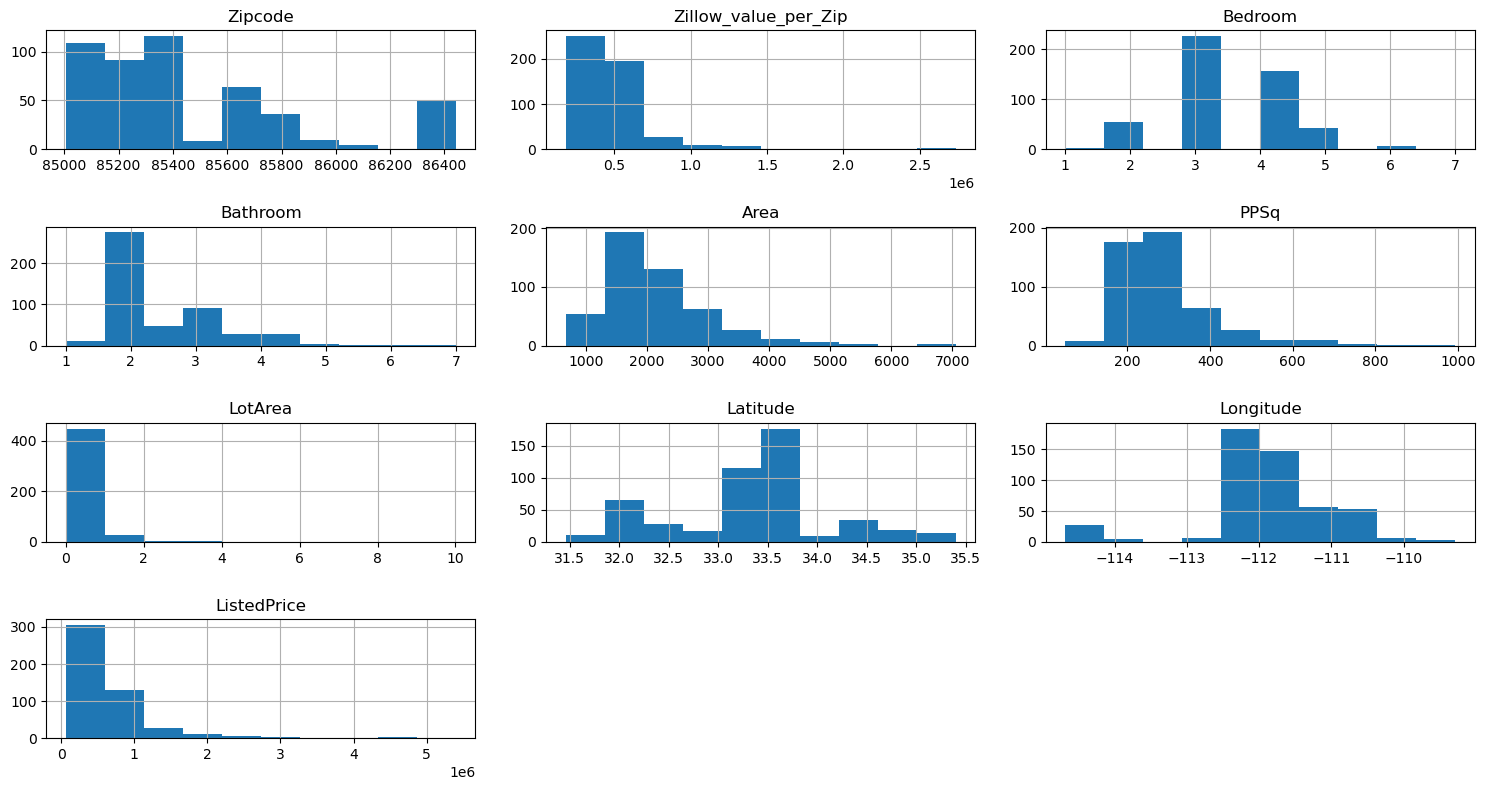

In [7]:
# multiple histograms for different variables
data = pd.DataFrame(zillow_df)
data.hist(figsize=(15, 8))
plt.tight_layout()
plt.show()

<Axes: >

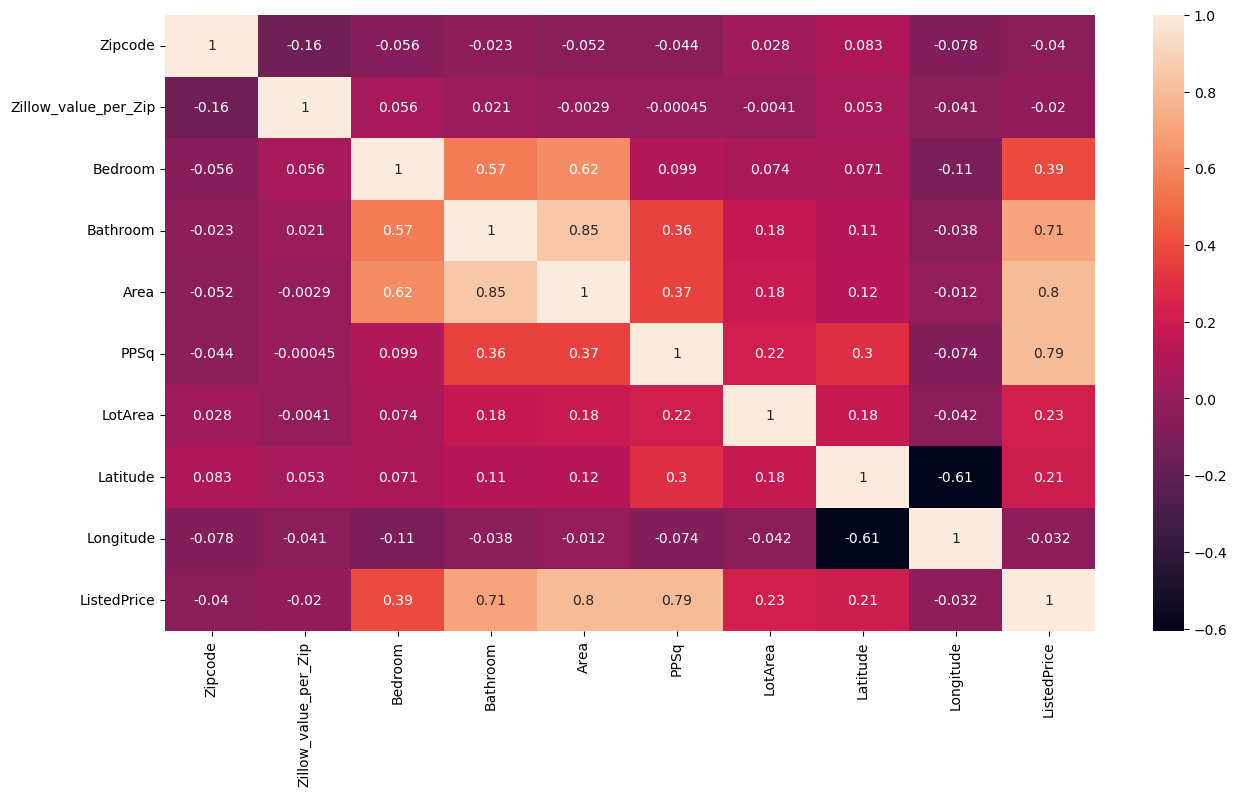

In [8]:
# correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)
#data.corr()

<Axes: xlabel='Latitude', ylabel='Longitude'>

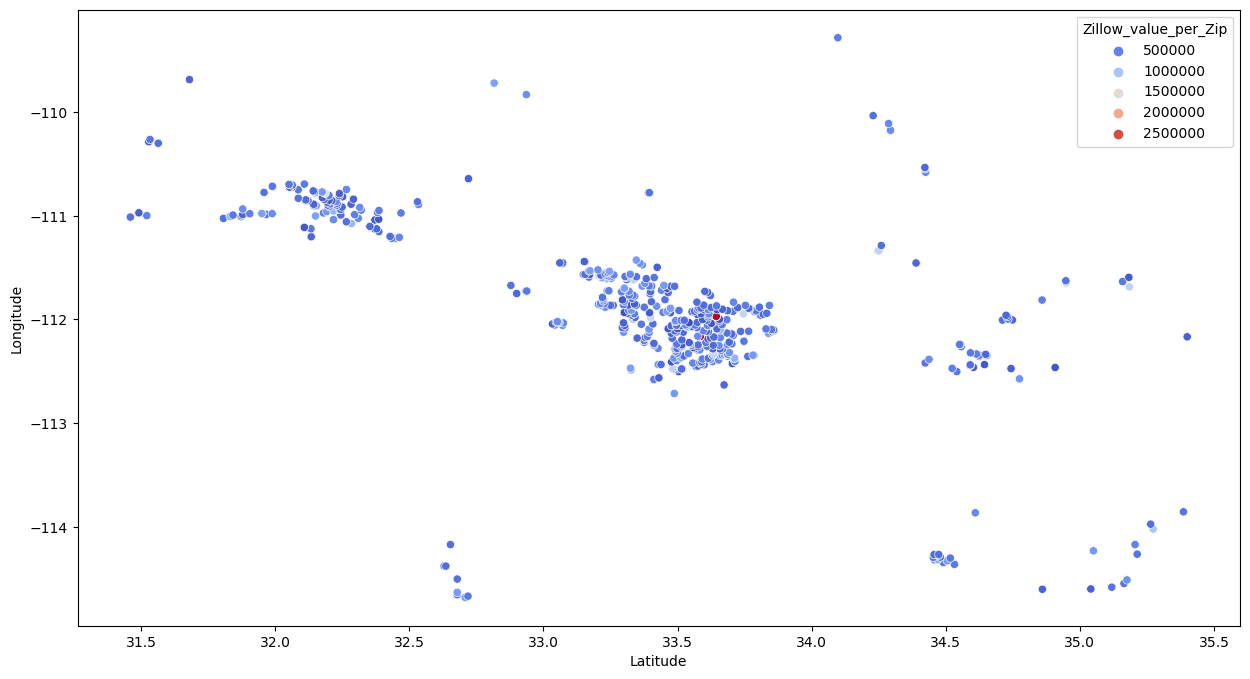

In [9]:
# scatter plot of Zillow house value per zip code
plt.figure(figsize=(15,8))
sns.scatterplot(data, x="Latitude", y="Longitude", hue="Zillow_value_per_Zip", palette="coolwarm")

In [10]:
# close connection
conn.close()